# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

2.7885577115423086 0.3457471656304173
2.7925585117023406 0.34199034689954394
2.7965593118623726 0.3382280541410268
2.8005601120224046 0.3344603475755556
2.8045609121824366 0.3306872875104755
2.8085617123424687 0.3269089343388218
2.8125625125025007 0.3231253485383533
2.8165633126625327 0.31933659067058423
2.8205641128225647 0.3155427213798149
2.8245649129825967 0.3117438013921611
2.8285657131426287 0.3079398915145818
2.8325665133026607 0.3041310526339062
2.8365673134626928 0.300317345715859
2.8405681136227248 0.29649883180408443
2.844568913782757 0.2926755720191694
2.8485697139427884 0.28884762755766547
2.8525705141028204 0.2850150596911077
2.8565713142628524 0.28117792976503625
2.8605721144228844 0.27733629919801306
2.8645729145829164 0.273490229480639
2.8685737147429484 0.2696397821745697
2.8725745149029804 0.26578501891153006
2.8765753150630125 0.2619260013923279
2.8805761152230445 0.25806279138586624
2.8845769153830765 0.25419545072815464
2.8885777155431085 0.2503240413213195
2.8925

0.582820847513807
6.909381876375275 0.5860672273319371
6.913382676535307 0.5893042263349867
6.917383476695339 0.5925317927103182
6.921384276855371 0.5957498747962755
6.925385077015403 0.5989584210830123
6.929385877175435 0.6021573802133157
6.933386677335467 0.6053467009834281
6.937387477495499 0.6085263323438678
6.941388277655531 0.611696223400245
6.945389077815563 0.6148563234140773
6.949389877975595 0.6180065818036009
6.953390678135627 0.6211469481445814
6.957391478295659 0.6242773721711199
6.961392278455691 0.6273978037764582
6.965393078615723 0.6305081930137804
6.9693938787757554 0.6336084900970126
6.9733946789357875 0.6366986454016198
6.9773954790958195 0.6397786094654003
6.9813962792558515 0.642848332989277
6.9853970794158835 0.6459077668380871
6.9893978795759155 0.6489568620413679
6.9933986797359475 0.6519955697941414
6.9973994798959795 0.6550238414576947
7.001400280056012 0.6580416285603591
7.005401080216044 0.6610488827982858
7.009401880376076 0.664045556036219
7.0134026805361

0.5303427519281645
8.869773954790958 0.5269467048818978
8.87377475495099 0.5235422233261324
8.877775555111022 0.520129361754296
8.881776355271054 0.5167081747939497
8.885777155431086 0.5132787172059139
8.889777955591118 0.509841043883392
8.89377875575115 0.5063952098510914
8.897779555911182 0.5029412702643431
8.901780356071214 0.49947928040821854
8.905781156231246 0.49600929569664487
8.909781956391278 0.49253137167151795
8.91378275655131 0.4890455640018133
8.917783556711342 0.4855519284826952
8.921784356871374 0.48205052103462315
8.925785157031406 0.47854139770245746
8.929785957191438 0.47502461465456153
8.93378675735147 0.47150022818190335
8.937787557511502 0.4679682946971539
8.941788357671534 0.46442887073378486
8.945789157831566 0.46088201294516307
8.949789957991598 0.45732777810364417
8.95379075815163 0.45376622309966363
8.957791558311662 0.45019740494082633
8.961792358471694 0.44662138075099383
8.965793158631726 0.4430382077693703
8.969793958791758 0.43944794334958615
8.9737947589

-0.6860228124083595
11.814362872574515 -0.6831064275000966
11.818363672734547 -0.6801791085303854
11.822364472894579 -0.6772409023550071
11.826365273054611 -0.6742918560040081
11.830366073214643 -0.6713320166809466
11.834366873374675 -0.6683614317621371
11.838367673534707 -0.6653801487958926
11.842368473694739 -0.6623882155017625
11.846369273854771 -0.65938567976977
11.850370074014803 -0.6563725896596446
11.854370874174835 -0.6533489934000534
11.858371674334867 -0.6503149393878286
11.862372474494899 -0.6472704761871936
11.866373274654931 -0.6442156525289849
11.870374074814963 -0.6411505173098727
11.874374874974995 -0.6380751195915777
11.878375675135027 -0.6349895086000861
11.88237647529506 -0.6318937337248619
11.886377275455091 -0.6287878445180557
11.890378075615123 -0.6256718906937124
11.894378875775155 -0.6225459221269746
11.898379675935187 -0.6194099888532849
11.90238047609522 -0.6162641410675846
11.906381276255251 -0.6131084291235107
11.910382076415283 -0.6099429035325895
11.914382

14.618923784756952 0.8861822805518063
14.622924584916984 0.8843214753742205
14.626925385077016 0.8824465154105535
14.630926185237048 0.8805574306721281
14.63492698539708 0.8786542513963534
14.638927785557112 0.8767370080462414
14.642928585717144 0.8748057313099188
14.646929385877176 0.8728604521001359
14.650930186037208 0.8709012015537719
14.65493098619724 0.8689280110313371
14.658931786357272 0.8669409121164695
14.662932586517304 0.8649399366154309
14.666933386677336 0.8629251165565964
14.670934186837368 0.8608964841899429
14.6749349869974 0.858854071986532
14.678935787157432 0.8567979126379907
14.682936587317464 0.8547280390559879
14.686937387477496 0.8526444843717081
14.690938187637528 0.8505472819353205
14.69493898779756 0.8484364653154453
14.698939787957592 0.8463120682986167
14.702940588117624 0.8441741248887419
14.706941388277656 0.8420226693065566
14.710942188437688 0.8398577359890776
14.71494298859772 0.8376793595890518
14.718943788757752 0.8354875749744006
14.722944588917784 

17.96759351870374 -0.771987741241335
17.971594318863772 -0.7694385113764188
17.975595119023804 -0.7668769655858643
17.979595919183836 -0.7643031448707481
17.98359671934387 -0.7617170904286242
17.9875975195039 -0.7591188436528641
17.991598319663932 -0.7565084461319946
17.995599119823964 -0.7538859396490317
17.999599919983996 -0.7512513661808125
18.00360072014403 -0.7486047678973222
18.00760152030406 -0.7459461871610205
18.011602320464092 -0.7432756665261622
18.015603120624125 -0.7405932487381169
18.019603920784157 -0.7378989767326848
18.02360472094419 -0.7351928936354086
18.02760552110422 -0.7324750427608846
18.031606321264253 -0.729745467612068
18.035607121424285 -0.7270042118795775
18.039607921584317 -0.7242513194409956
18.04360872174435 -0.7214868343601664
18.04760952190438 -0.7187108008864899
18.051610322064413 -0.7159232634542146
18.055611122224445 -0.7131242666817256
18.059611922384477 -0.7103138553708302
18.06361272254451 -0.7074920745060416
18.06761352270454 -0.704658969253858
1

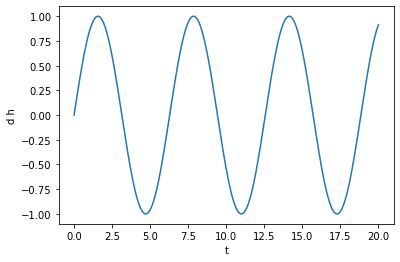

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

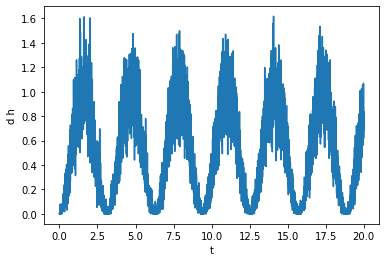

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

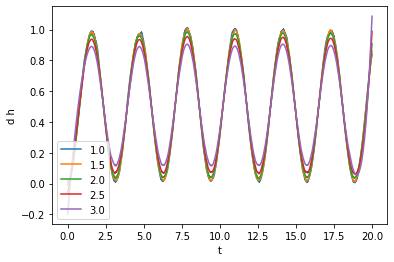

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

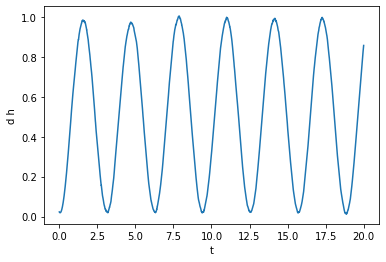

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1993


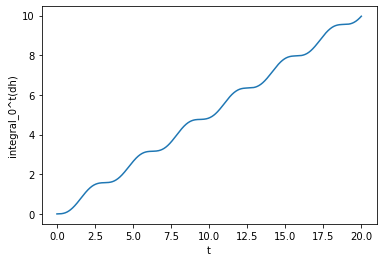

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

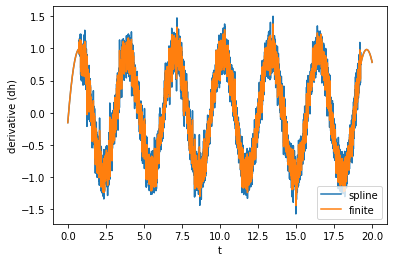

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

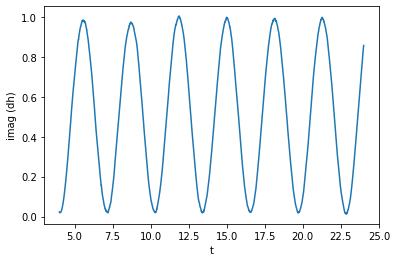

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

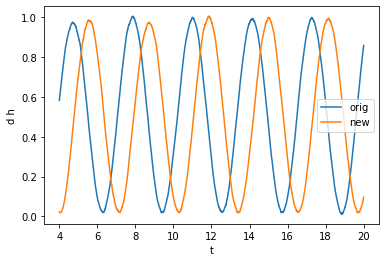

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

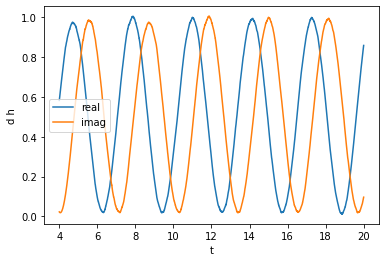

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

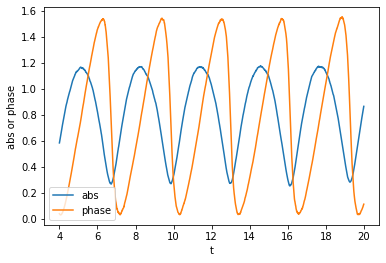

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

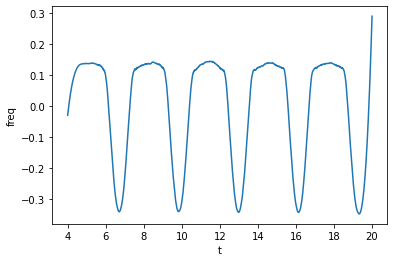

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

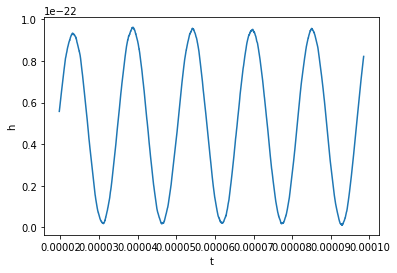

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

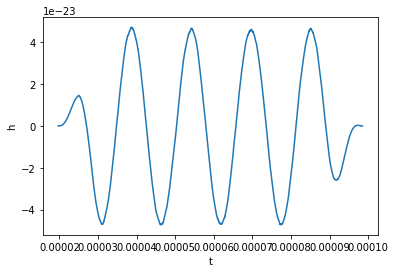

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

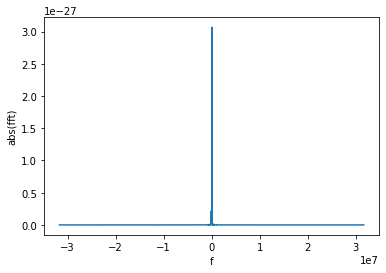

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

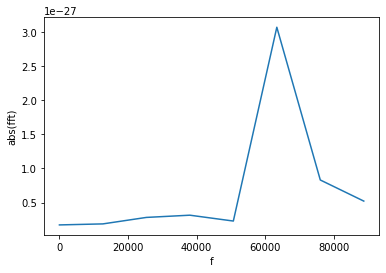

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64183.49


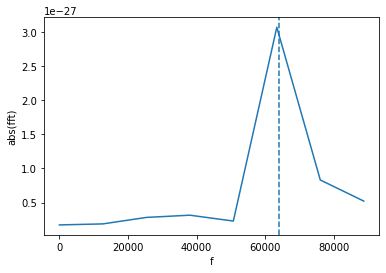

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.067e-27
Maximum with mask 8.300e-28
Length with mask 8
Length after having removed the masked points 7
